<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Heart_diseas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline:
1. Read dataset.
2. Null control.
3. Seperate features and labels
4. Create train and test sets.
5. Feature scaling with MinMaxScaler
6. Shape control
7. Create model , compile , fit.
8. Evaluate.
9. Prediction.

In [1]:
import pandas as pd
dataset = pd.read_csv("heart.csv")

In [2]:
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
X = dataset.drop("output" , axis = 1)
y = dataset["output"]
X[ : 20]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test)  , len(y_train)  , len(y_test)
X_train.shape

(242, 13)

In [11]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler'ı oluştur
scaler = MinMaxScaler()

# MinMaxScaler'ı sadece bağımsız değişkenlere uygula
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['age', 'cp', 'trtbps' , 'chol' , 'thalachh' , 'oldpeak' ,'slp' , 'caa' ,  'thall']] = scaler.fit_transform(X_train_scaled[['age', 'cp', 'trtbps' , 'chol' , 'thalachh' , 'oldpeak' ,'slp' , 'caa' ,  'thall']])
X_test_scaled[['age', 'cp', 'trtbps' , 'chol' , 'thalachh' , 'oldpeak' ,'slp' , 'caa' ,  'thall']] = scaler.transform(X_test_scaled[['age', 'cp', 'trtbps' , 'chol' , 'thalachh' , 'oldpeak' ,'slp' , 'caa' ,  'thall']] )

In [13]:
X_train_scaled.shape , y_train.shape

((242, 13), (242,))

In [23]:
import tensorflow as tf
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100 , activation = "relu") ,
        tf.keras.layers.Dense(10 , activation = "relu") ,
        tf.keras.layers.Dense(1 , activation = "sigmoid") ,

    ]
)
model.compile(
    loss = tf.keras.losses.mae ,
    optimizer = tf.keras.optimizers.Adam() ,
    metrics = ["accuracy"]
)

history = model.fit(
    X_train_scaled ,
    y_train ,
    epochs = 50 ,
    validation_data = ( X_test_scaled , y_test )
)

Epoch 1/50
8/8 [==============================] - 1s 27ms/step - loss: 0.4936 - accuracy: 0.5537 - val_loss: 0.4819 - val_accuracy: 0.5246
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4720 - accuracy: 0.5496 - val_loss: 0.4616 - val_accuracy: 0.5246
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4537 - accuracy: 0.5496 - val_loss: 0.4434 - val_accuracy: 0.5410
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4356 - accuracy: 0.5744 - val_loss: 0.4248 - val_accuracy: 0.6230
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4176 - accuracy: 0.6322 - val_loss: 0.4057 - val_accuracy: 0.6721
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4002 - accuracy: 0.6612 - val_loss: 0.3858 - val_accuracy: 0.7049
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3820 - accuracy: 0.6901 - val_loss: 0.3672 - val_accuracy: 0.7541
Epoch 8/50
8/8 [=================

In [16]:
model.evaluate( X_test_scaled , y_test )

2/2 [==============================] - 0s 8ms/step - loss: 0.4970 - accuracy: 0.8525


[0.49696797132492065, 0.8524590134620667]

Text(0.5, 1.0, 'Normalized Loss curve')

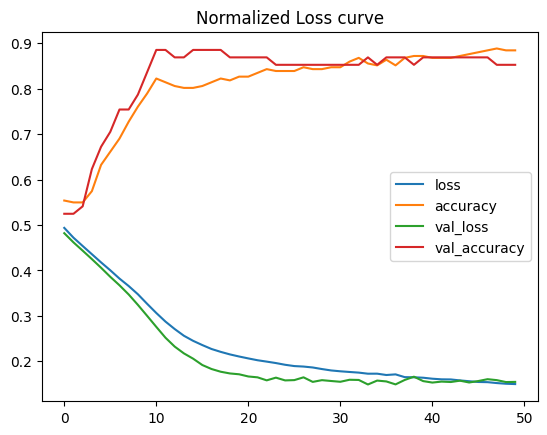

In [24]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.title("Normalized Loss curve")